# SCAN (10 - 25 pts)

### 1. Explain Spectral clustering and different types of Laplassians

- Provide formulas via tex code
- Provide your text explanation
- Provide your plot demonstration

### 2. Given Data

![pic](graph.jpg)

### 3. Perform SCAN algorithm on a given graph starting from node 13

Thresholds `mu` = 3, `eps` = 0.42

In [1]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(range(0,14))
G.add_edges_from([(0,1), (0,4), (0,5), (0,6), (1,2),(1,5),(2,3),(2,5),(3,4),(3,5),(3,6),(4,5),(4,6), (6,7),(6,10),(6,11),
                 (7,8),(7,11),(7,12),(8,9),(8,12),(9,10),(9,12),(9,13),(10,11),(10,12),(11,12)])
nx.draw(G, with_labels=True)


C:\Users\the_art_of_war\AppData\Local\conda\conda\envs\PUTON\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


In [2]:
eps = 0.7
mu = 2

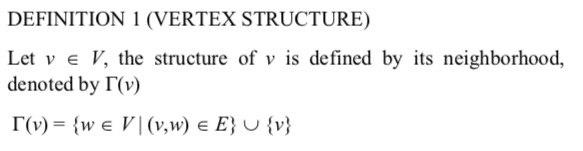

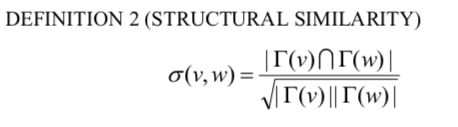

In [3]:
import numpy as np
def sim_score(u,v):
    A = set(list(G.adj[u]) + [u]) 
    B = set(list(G.adj[v]) + [v])
    
    return len((A & B)) / (np.sqrt( len(A) * len(B)) )
    
    

In [4]:
sim_score(10,12)

0.7302967433402214

In [5]:
sim_score(13,9)

0.6324555320336759

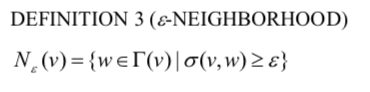

In [6]:
def neiborghood(v):
    tos = list(G.adj[v])
    tos.append(v)
    res = []
    for to in tos:
        if sim_score(v,to) >= eps:
            res.append(to)
    return res 

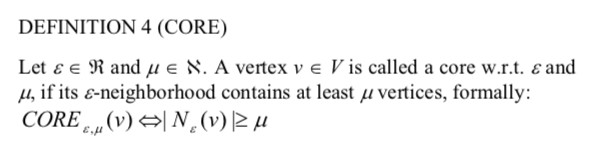

In [7]:
def core(v):
    n = neiborghood(v)
    return len(n) >= mu



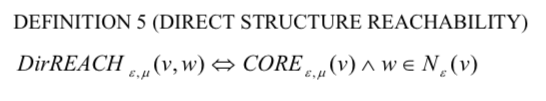

In [8]:
def dir_reach(v, w):
    n = neiborghood(v)
    return core(v) and (w in n) 

In [9]:
def my_dir_reach(v):
    n = neiborghood(v)
    res = []
    for to in n:
        if dir_reach(v,to):
            res.append(to)
    return res

Red ones are cores


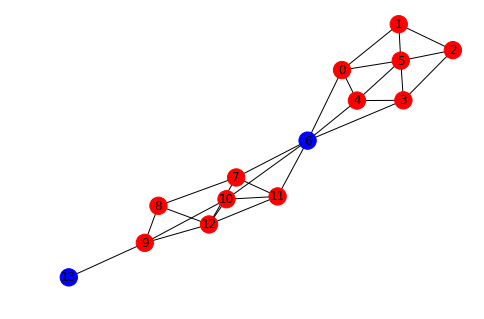

In [10]:
colors_core = ['']*14
for i in range(14):
    colors_core[i] = 'red' if core(i) else 'blue'
print('Red ones are cores')
nx.draw(G, with_labels=True, node_color=colors_core)

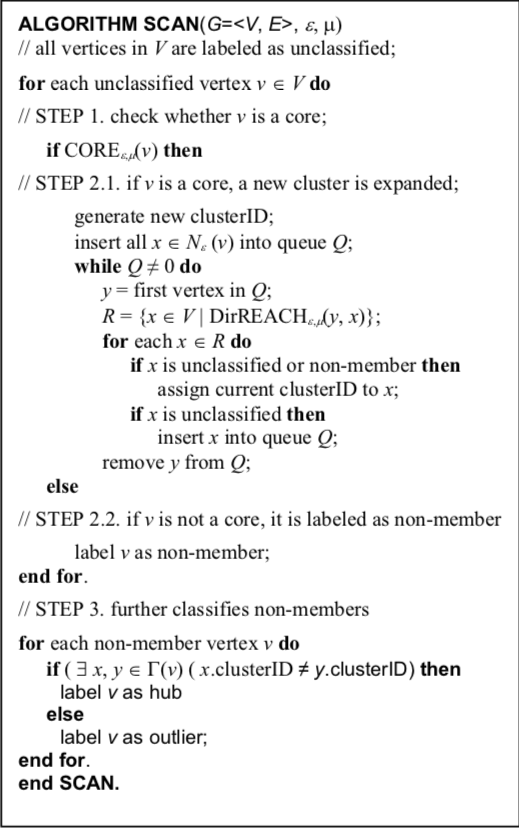

In [11]:
non_member = -1
hub = -228
outlier = -322

def main_scan():
    nodes = G.nodes
    N = len(nodes)
    cluster = [0] * N
    
    cluster_id = 1
    
    for v in range(N):
        if cluster[v] == 0:
            if core(v):
                new_id = cluster_id
                cluster_id+=1
                ns = neiborghood(v)
                q = ns.copy()
                top_q = 0
                while top_q < len(q):
                    y = q[top_q]
                    top_q+=1
                    for to in my_dir_reach(y):
                        if cluster[to] > 0: # has cluster id
                            continue;
                        
                        if cluster[to] == non_member:
                            cluster[to] = new_id
                        else:
                            cluster[to] = new_id
                            q.append(to)
            else:
                cluster[v] = non_member
                
    for v in range(N):
        if cluster[v] == non_member:
            tos = list(G.adj[v])
            flag = False
            for to1 in tos:
                for to2 in tos:
                    if(cluster[to1] != cluster[to2]):
                        flag = True
                        break
            
            if flag:
                cluster[v] = hub
            else:
                cluster[v] = outlier
                
    return cluster
                        
                
                
            

In [12]:
sim_score(13,9)

0.6324555320336759

In [13]:
clustering = main_scan()

In [14]:
hubs = []
outliers = []
for i in range(14):
    if clustering[i] == outlier:
        outliers.append(i)
    elif clustering[i] == hub:
        hubs.append(i);
print("hubs ", hubs)
print("outliers ", outliers)

hubs  [6]
outliers  [13]


In [15]:
print(clustering)

[1, 1, 1, 1, 1, 1, -228, 2, 2, 2, 2, 2, 2, -322]


[0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 3]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


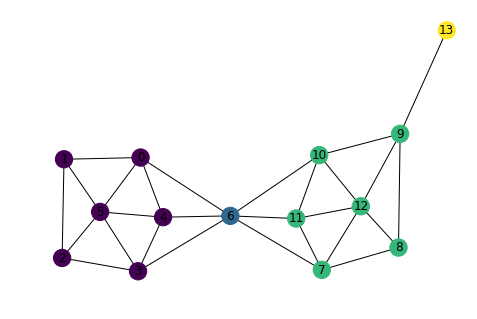

In [16]:
used = {}
cnt = 0
for idx, i in enumerate(clustering,0):
    if i not in used.keys():
        used[i] = cnt
        cnt += 1
    clustering[idx] = used[i] 
print(clustering)
print(G.nodes)
nx.draw(G, with_labels=True, node_color=clustering)

### 4. Show all the steps for computation.

You can stop when you found at least one (complete) cluster.

Answer:
    
    
